In [1116]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [1117]:
def show_image(image,cmap=""):
    if not cmap:
        plt.imshow(image)
    else:
        plt.imshow(image,cmap=cmap)

    # display that image
    plt.show()

In [1118]:
path = "../data/passport_data/rotated_passport.jpg"

In [1119]:
image = cv2.imread(path) # path = path to your file
# bin = cv2.inRange(image, (255, 255, 255), (255, 255,255))
# cv2.bitwise_not(bin, bin)
# cnts = cv2.findContours(bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)
# cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
# x,y,w,h = cv2.boundingRect(cnts[0])
# # cv2.rectangle(image, rect, (0,255,0), 1)

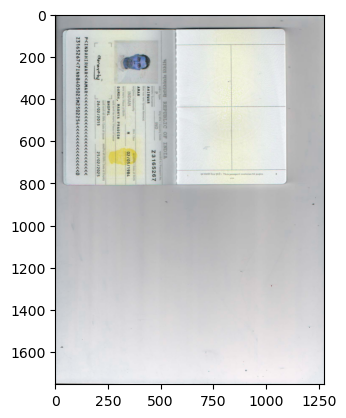

In [1120]:
show_image(image)

In [1121]:
print(image.shape)
ori = image.copy()
i#mage = cv2.resize(image, (image.shape[1]//10,image.shape[0]//10))

(1754, 1275, 3)


array([[234, 152]])

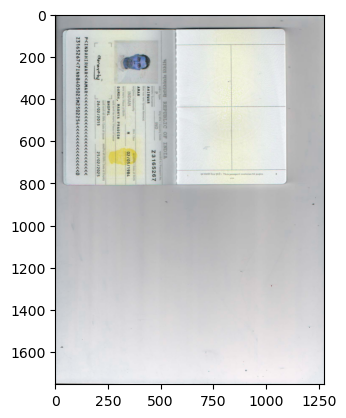

In [1122]:
show_image(image)

In [1123]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [1124]:
#gray = cv2.GaussianBlur(gray, (3,3), 0)

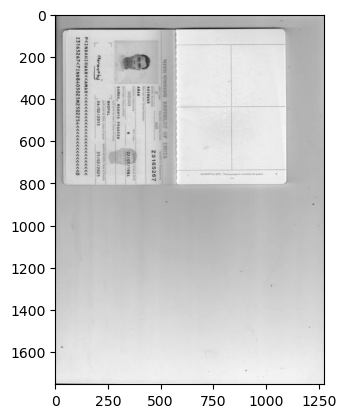

In [1125]:
show_image(gray,"gray")

In [1126]:
edged = cv2.Canny(gray, 100, 150)

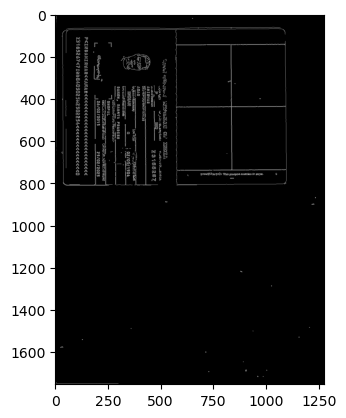

In [1127]:
show_image(edged,"gray")

In [1128]:
# Dilate the edges to close gaps
kernel = np.ones((3, 3), np.uint8)
dilated_edges = cv2.dilate(edged, kernel, iterations=3)

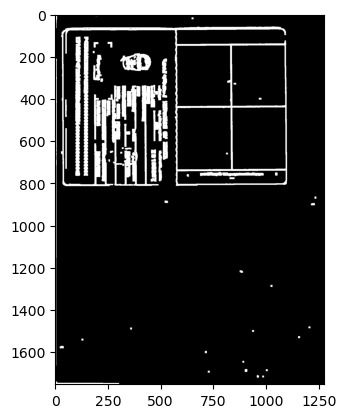

In [1129]:
show_image(dilated_edges,"gray")

In [1131]:
eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)

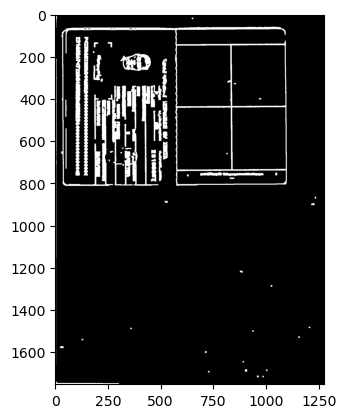

In [1132]:
show_image(eroded_edges,"gray")

In [1133]:
cnts = cv2.findContours(dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [1134]:
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [1135]:
len(cnts)

59

In [1136]:
#cnts = sorted(cnts, key = cv2.contourArea, reverse = True)

STEP 2: Finding Boundary
STEP 2: Finding Boundary
STEP 2: Finding Boundary


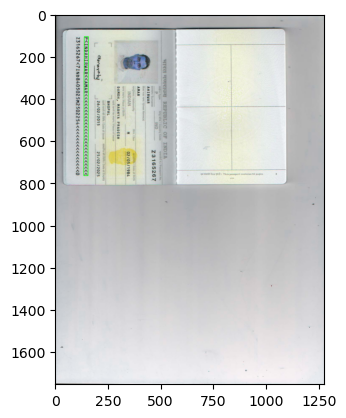

In [1137]:
for c in cnts:
    ### Approximating the contour
    #Calculates a contour perimeter or a curve length
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    screenCnt = approx
    if len(approx) == 4:
        screenCnt = approx
        break
    # show the contour (outline) 
    print("STEP 2: Finding Boundary")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
image_e = cv2.resize(image,(image.shape[1],image.shape[0]))
cv2.imwrite('image_edge.jpg',image_e)
plt.imshow(image_e)
plt.show()

STEP 1: Edge Detection


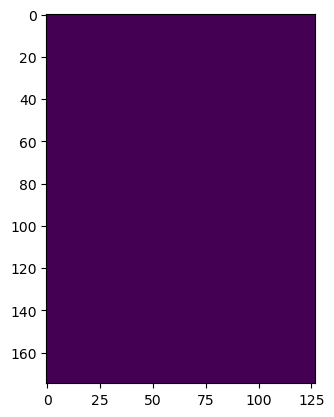

TypeError: 'NoneType' object is not iterable

In [920]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11,11), 0)
edged = cv2.Canny(gray, 75, 200)
print("STEP 1: Edge Detection")
plt.imshow(edged)
plt.show()
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts[1], key = cv2.contourArea, reverse = True)[:5]


In [909]:
# MASK = np.array(image/255.0, dtype='float32')

# MASK = cv2.GaussianBlur(MASK, (3,3), 11)

In [910]:
# show_image(MASK)

In [911]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

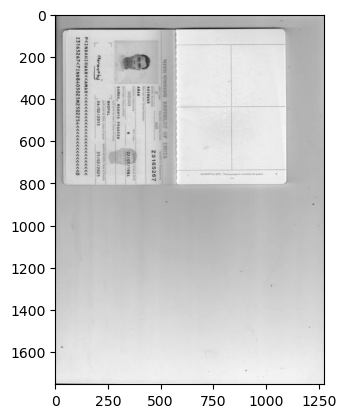

In [912]:
show_image(img_gray,"gray")

In [895]:
def extract_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Dilate the edges to close gaps
    kernel = np.ones((3, 3), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

        if len(approx) == 4:
            return approx

    return None

In [896]:
# def perspective_transform(image, corners):
#     width, height = 250, 350
#     destination_corners = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])

#     transformation_matrix = cv2.getPerspectiveTransform(corners, destination_corners)
#     transformed_image = cv2.warpPerspective(image, transformation_matrix, (width, height))

#     return transformed_image

In [897]:
# def perspective_transform(image, corners):
#     width, height = 250, 350
#     destination_corners = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])

#     source_corners = np.float32([corners[0][0], corners[1][0], corners[2][0], corners[3][0]])
    
#     transformation_matrix = cv2.getPerspectiveTransform(source_corners, destination_corners)
#     transformed_image = cv2.warpPerspective(image, transformation_matrix, (width, height))

#     return transformed_image

In [898]:
# def perspective_transform(image, corners, interpolation=cv2.INTER_LINEAR):
#     width, height = 250, 350
#     destination_corners = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])

#     source_corners = np.float32([corners[0][0], corners[1][0], corners[2][0], corners[3][0]])
    
#     transformation_matrix = cv2.getPerspectiveTransform(source_corners, destination_corners)
#     transformed_image = cv2.warpPerspective(image, transformation_matrix, (width, height), flags=interpolation)

#     return transformed_image

In [899]:
# def perspective_transform(image, corners,interpolation=cv2.INTER_LINEAR):
#     original_width, original_height = image.shape[1], image.shape[0]
#     destination_width, destination_height = 600, 0

#     aspect_ratio = original_width / original_height
#     destination_height = int(destination_width / aspect_ratio)

#     destination_corners = np.float32([[0, 0], [destination_width - 1, 0], [destination_width - 1, destination_height - 1], [0, destination_height - 1]])

#     source_corners = np.float32([corners[0][0], corners[1][0], corners[2][0], corners[3][0]])
    
#     transformation_matrix = cv2.getPerspectiveTransform(source_corners, destination_corners)
#     transformed_image = cv2.warpPerspective(image, transformation_matrix, (destination_width, destination_height),flags=interpolation)

#     return transformed_image

In [900]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")

    s = np.sum(pts, axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect

In [901]:
def perspective_transform(image, corners,width):
    aspect_ratio = float(image.shape[1]) / float(image.shape[0])
    height = int(width / aspect_ratio)

    ordered_corners = order_points(corners.reshape(4, 2))
    pts1 = np.float32(ordered_corners)

    pts2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(image, matrix, (width, height))

    return result

corners =  [[[189  61]]

 [[149 158]]

 [[217 188]]

 [[258  87]]]


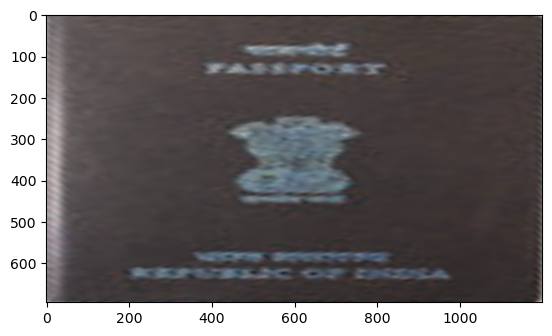

In [902]:
# Extract corners
corners = extract_corners(image)
print('corners = ',corners)
if corners is not None:
    # Set the desired width
    desired_width = 1200
    # Perform perspective transformation
    transformed_image = perspective_transform(image, corners,desired_width)
    show_image(transformed_image)
    
else:
    print("Unable to find ID card corners.")

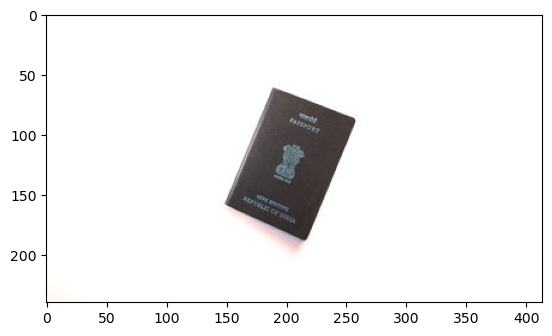

In [903]:
show_image(image)

In [741]:
def check_rotated_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    if lines is not None:
        angles = []

        for line in lines:
            rho, theta = line[0]
            angle = theta * 180 / np.pi
            angles.append(angle)

        median_angle = np.median(angles)
        return median_angle

    return None

In [742]:
# Check if the image is rotated and get the angle
angle = check_rotated_image(transformed_image)

if angle is not None:
    print("Image is rotated by an angle of {:.2f} degrees.".format(angle))
else:
    print("Image is not rotated.")

Image is rotated by an angle of 90.00 degrees.


In [743]:
bi = cv2.bilateralFilter(img_gray, 5, 75, 75)

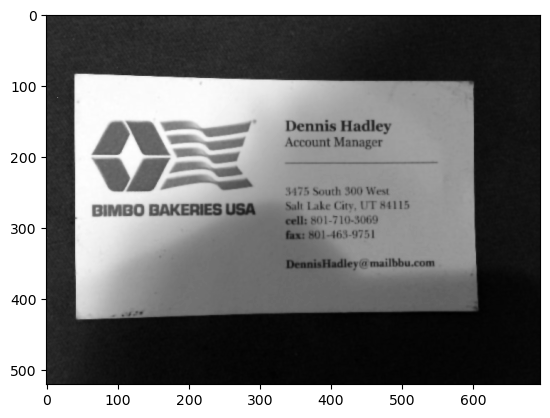

In [744]:
show_image(bi,"gray")

In [745]:
bi

array([[45, 45, 43, ..., 21, 21, 20],
       [45, 45, 44, ..., 21, 21, 21],
       [48, 48, 47, ..., 22, 23, 23],
       ...,
       [44, 43, 41, ..., 11, 11, 11],
       [41, 41, 40, ..., 11, 12, 12],
       [40, 40, 40, ..., 12, 12, 13]], dtype=uint8)

In [746]:
ret, thresh1 = cv2.threshold(bi, 120, 255, cv2.THRESH_BINARY)

In [747]:
# dst = cv2.cornerHarris(bi, 2, 3, 0.04)

In [748]:
# show_image(dst,"gray")

In [749]:
# dst

In [750]:
im_bw = cv2.threshold(dst, 125, 255, cv2.THRESH_BINARY)[1]

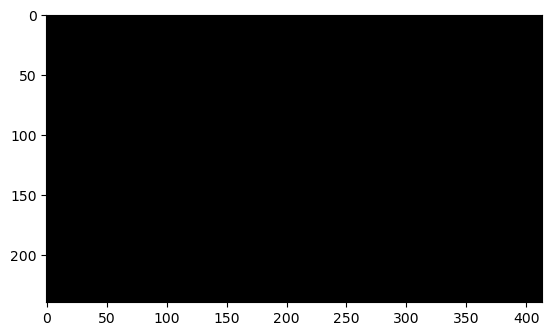

In [751]:
show_image(im_bw,"gray")

In [752]:
kernel = np.ones((1,1), np.uint8)  # note this is a horizontal kernel
d_im = cv2.dilate(dst, kernel, iterations=8)
e_im = cv2.erode(d_im, kernel, iterations=1) 

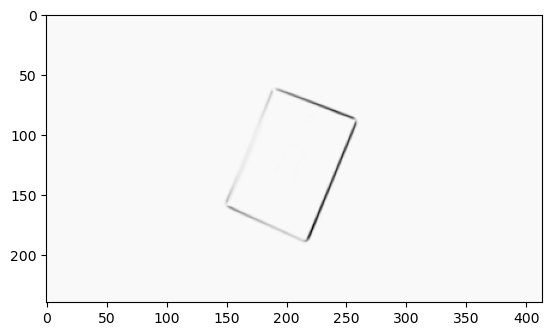

In [753]:
show_image(e_im,"gray")

In [754]:
# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(dst, 27, 0.01, 10)
corners = np.int0(corners)

In [755]:
# we iterate through each corner, 
# making a circle at each point that we think is a corner.
for i in corners:
    x, y = i.ravel()
    cv2.circle(image, (x, y), 3, 255, -1)

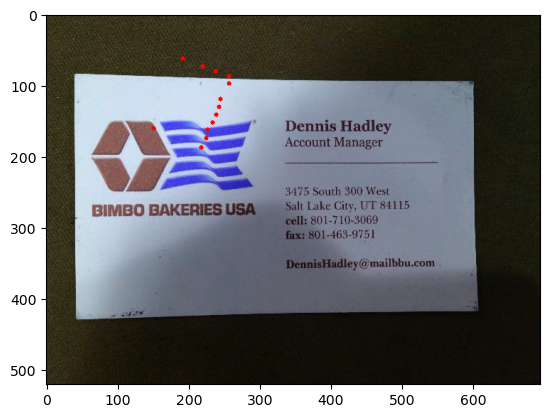

In [756]:
show_image(image)

In [757]:
thresh = cv2.erode(dst, None, iterations=2)

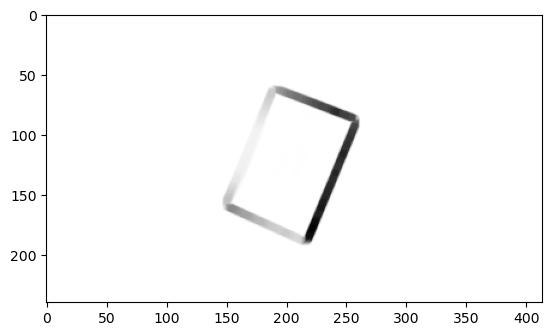

In [758]:
show_image(thresh,"gray")

In [759]:
mask = np.zeros_like(img_gray)

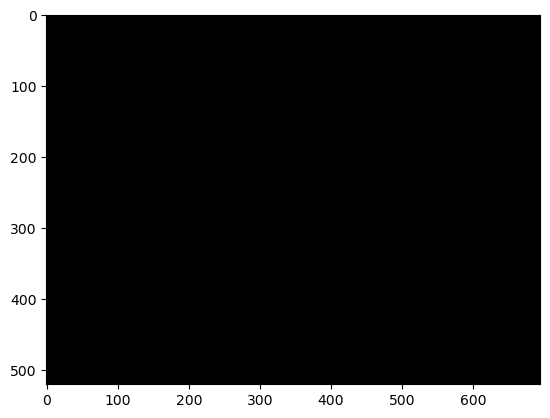

In [760]:
show_image(mask,"gray")

In [761]:
mask[thresh>0] = 255

IndexError: boolean index did not match indexed array along dimension 0; dimension is 520 but corresponding boolean dimension is 240

In [ ]:
show_image(mask,"gray")

In [ ]:
coordinates = np.argwhere(mask)

In [ ]:
coordinates

In [ ]:
edges = cv2.Canny(img_gray,100,200)
ret,th2 = cv2.threshold(edges,100,255,cv2.THRESH_BINARY_INV)

In [ ]:
show_image(th2,"gray")

In [ ]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (250, 250))

In [ ]:
blackhat = cv2.morphologyEx(th2, cv2.MORPH_BLACKHAT, rectKernel)

In [ ]:
show_image(blackhat,"gray")

In [ ]:
# apply binary thresholding
ret, thresh = cv2.threshold(blackhat, 150, 255, cv2.THRESH_BINARY)

In [ ]:
show_image(thresh,"gray")

In [ ]:
contours,hierarchy =cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
rectangles=[]
coord = []
for cont in reversed(contours):
    area=cv2.contourArea(cont)
    x, y, w, h = cv2.boundingRect(cont)
    coord.append((x, y, w, h))
    rectangles.append([[x,y],[x+w,y],[x+w,y+h],[x,y+h]])

In [ ]:
rectangles

In [ ]:
coord

In [ ]:
#thresh = cv2.dilate(thresh, None, iterations=8)

In [ ]:
#show_image(thresh,"gray")

In [ ]:
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, rectKernel)

In [ ]:
#show_image(thresh,"gray")

In [ ]:
# cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
#               cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
#cnts

In [ ]:
# cnts = imutils.grab_contours(cnts)
# cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [ ]:
# for c in cnts:
#     (x, y, w, h) = cv2.boundingRect(c)
#     print((x, y, w, h))

In [ ]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle((149, 61), 110, 128, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()